In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)


In [2]:
data = pd.read_csv("/Users/rutwijdaptardar/attrition.csv")
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
display(data.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
t_map = {'Yes':1, 'No':0}
data["Attrition_numerical"] = data["Attrition"].apply(lambda x: t_map[x])
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']
data = data.drop(['Attrition_numerical'], axis=1)


In [5]:
categorical = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)


In [6]:
numerical = data.columns.difference(categorical)


In [7]:
data_cat = data[categorical]
data_cat = data_cat.drop(['Attrition'], axis=1) 

In [8]:
data_num = data[numerical]
data_final = pd.concat([data_num, data_cat], axis=1)

In [9]:
target_map = {'Yes':1, 'No':0}
target = data["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [10]:
data_final

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,0,5,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,49,279,8,1,1,2,3,61,2,2,...,1,7,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,33,1392,3,4,1,5,4,56,3,1,...,3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,27,591,2,1,1,7,1,40,3,1,...,2,2,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
5,32,1005,2,2,1,8,4,79,3,1,...,3,6,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
6,59,1324,3,3,1,10,3,81,4,1,...,0,0,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Y,Yes
7,30,1358,24,1,1,11,4,67,3,1,...,0,0,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,Y,No
8,38,216,23,3,1,12,4,44,2,3,...,1,8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No
9,36,1299,27,3,1,13,3,94,3,2,...,7,7,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No


In [11]:
data_train, data_test = train_test_split(data, test_size=0.30)

In [12]:
data_train.count()

Age                         1029
Attrition                   1029
BusinessTravel              1029
DailyRate                   1029
Department                  1029
DistanceFromHome            1029
Education                   1029
EducationField              1029
EmployeeCount               1029
EmployeeNumber              1029
EnvironmentSatisfaction     1029
Gender                      1029
HourlyRate                  1029
JobInvolvement              1029
JobLevel                    1029
JobRole                     1029
JobSatisfaction             1029
MaritalStatus               1029
MonthlyIncome               1029
MonthlyRate                 1029
NumCompaniesWorked          1029
Over18                      1029
OverTime                    1029
PercentSalaryHike           1029
PerformanceRating           1029
RelationshipSatisfaction    1029
StandardHours               1029
StockOptionLevel            1029
TotalWorkingYears           1029
TrainingTimesLastYear       1029
WorkLifeBa

In [13]:
data_test.count()

Age                         441
Attrition                   441
BusinessTravel              441
DailyRate                   441
Department                  441
DistanceFromHome            441
Education                   441
EducationField              441
EmployeeCount               441
EmployeeNumber              441
EnvironmentSatisfaction     441
Gender                      441
HourlyRate                  441
JobInvolvement              441
JobLevel                    441
JobRole                     441
JobSatisfaction             441
MaritalStatus               441
MonthlyIncome               441
MonthlyRate                 441
NumCompaniesWorked          441
Over18                      441
OverTime                    441
PercentSalaryHike           441
PerformanceRating           441
RelationshipSatisfaction    441
StandardHours               441
StockOptionLevel            441
TotalWorkingYears           441
TrainingTimesLastYear       441
WorkLifeBalance             441
YearsAtC

In [14]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(data_train[numerical], data_train["Attrition"])
predictions = clf.predict(data_test[numerical])
probs = clf.predict_proba(data_test[numerical])
display(predictions)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 

In [15]:
import seaborn as sb

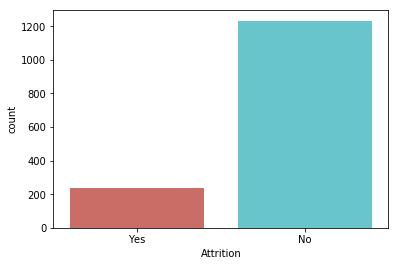

In [16]:
sb.countplot(x='Attrition',data=data,palette='hls')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
#target_map = {'Yes':1, 'No':0}
#target = data["Attrition"].apply(lambda x: target_map[x])
#x=scale(data_num)
#y = data.ix[:,9].values
#logreg=LogisticRegression()
#logreg.fit(x,y)
#print(logreg.score(x,y))
#y_pred=logreg.predict(x)
#from sklearn.metrics import classification_report
#print(classification_report(y,y_pred))

In [18]:
trace = go.Scatter(
    y = clf.feature_importances_,
    x = data_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = clf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = data_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [19]:
get_ipython().magic('matplotlib inline')
c=confusion_matrix(data_test["Attrition"], predictions)
confusion_matrix = pd.DataFrame(
    c, 
    columns=["Predicted No", "Predicted Yes"], 
    index=["Actual No", "Actual Yes"]
)
display(confusion_matrix)

,Predicted No,Predicted Yes
Actual No,360,6
Actual Yes,68,7


In [20]:
score = clf.score(data_test[numerical], data_test["Attrition"])
print("Accuracy: ", score)

Accuracy:  0.8321995464852607


In [21]:
import seaborn as sb

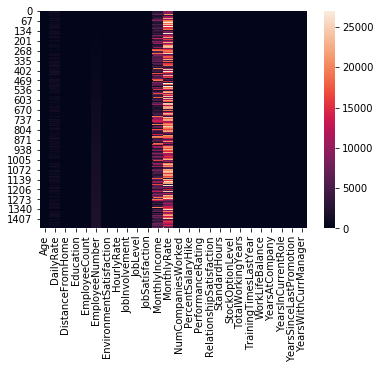

In [27]:
sb.heatmap(data_num)